In [1]:
# Draw all defined elements, with color and fill

In [2]:
import schemdraw
from schemdraw import elements as elm
schemdraw.use('svg')

In [3]:
def drawElements(elm_list, n=5, dx=1, dy=2, ofst=.8, fname=None, **kwargs):
    x, y = 0, 0
    d = schemdraw.Drawing(fontsize=12)
    for e in elm_list:
        element = getattr(elm, e)
        d += element().right().at(((d.unit+1)*x+1,y)).label(e, loc='top', ofst=.1)
        x = x + dx
        if x >= n:
            x=0
            y=y-dy
    return d

def listmod(modname):
    module = getattr(elm, modname)
    elist = []
    enames = getattr(module, '__all__', []) or dir(module)
    for ename in enames:
        e = getattr(module, ename)
        if hasattr(e, '_position') and ename not in ['Element', 'Element2Term', 'ElementDrawing']:
            elist.append(ename)
    return elist

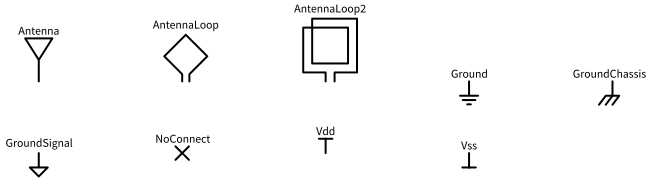

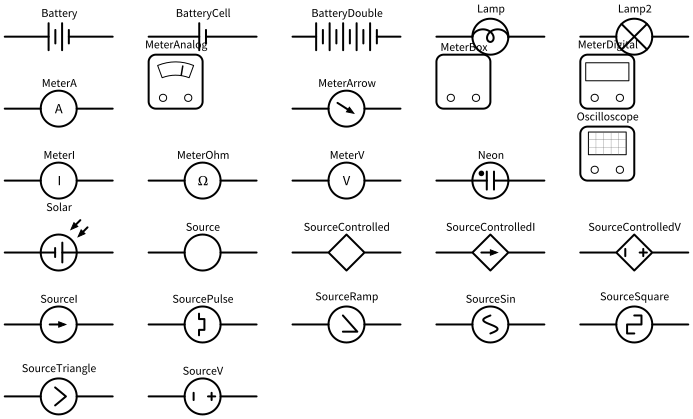

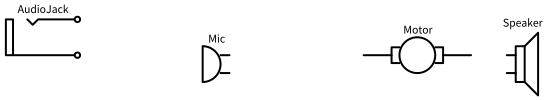

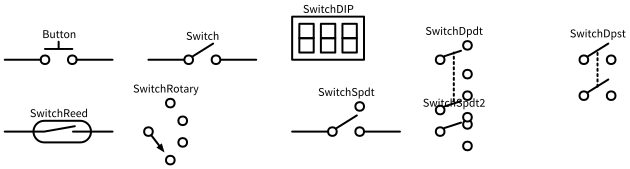

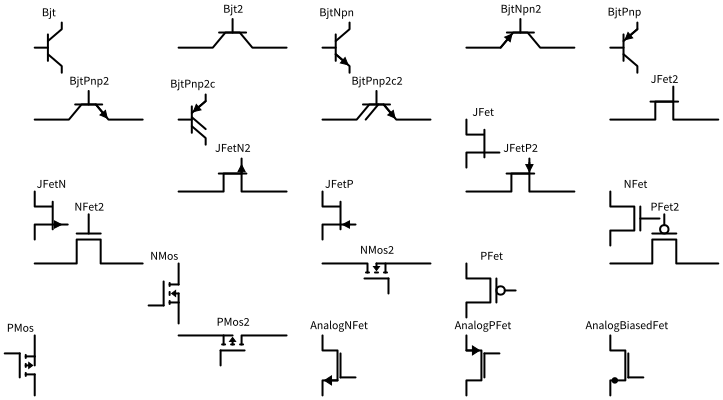

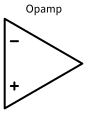

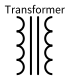

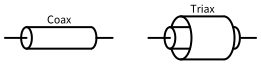

In [4]:
for mod in ['oneterm', 'sources', 'misc', 'switches',
            'transistors', 'opamp', 'xform', 'cables']:
    display(drawElements(listmod(mod), d='right'))

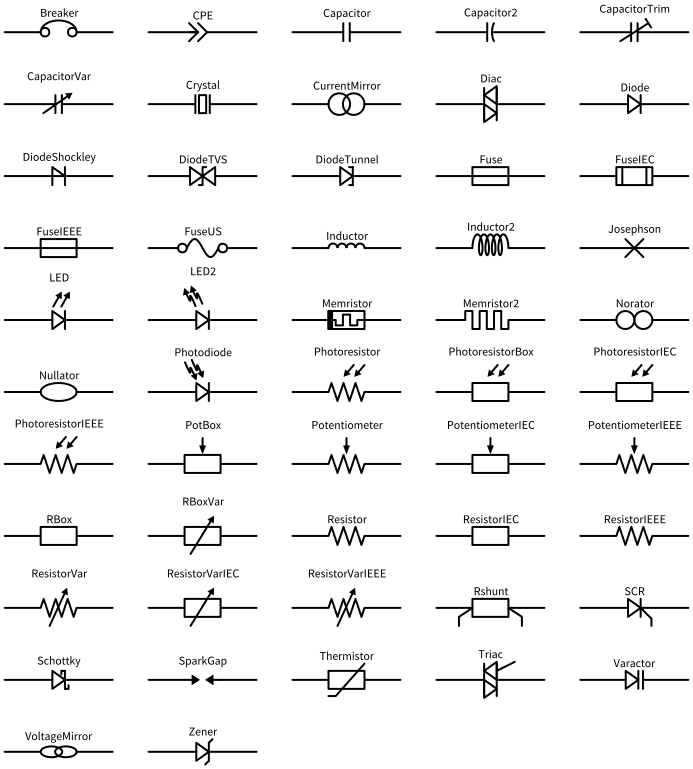

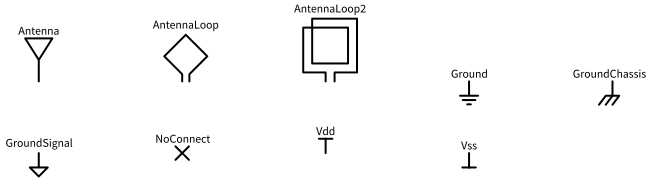

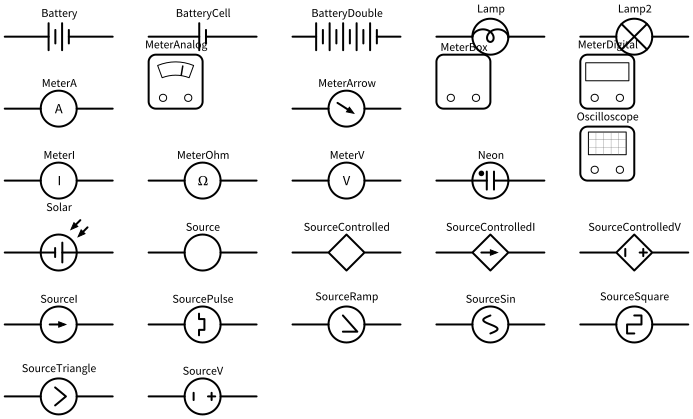

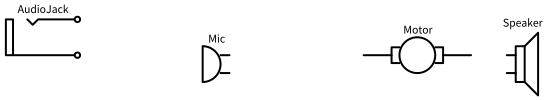

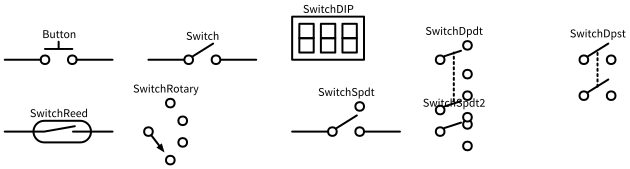

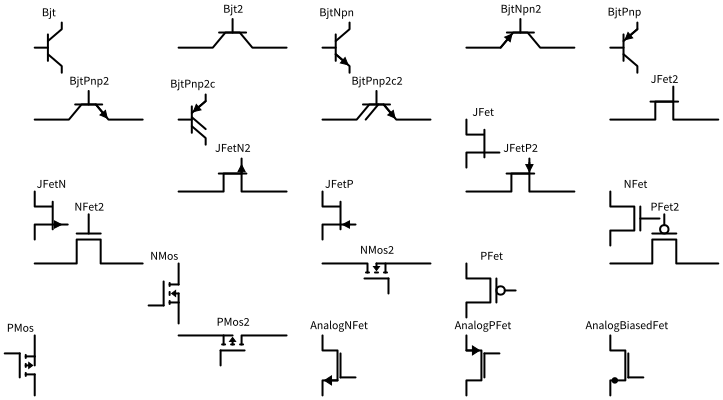

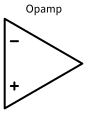

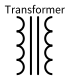

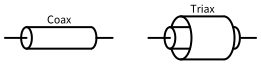

In [5]:
for mod in ['twoterm', 'oneterm', 'sources', 'misc', 'switches',
            'transistors', 'opamp', 'xform', 'cables']:
    display(drawElements(listmod(mod), d='right', fill='yellow'))

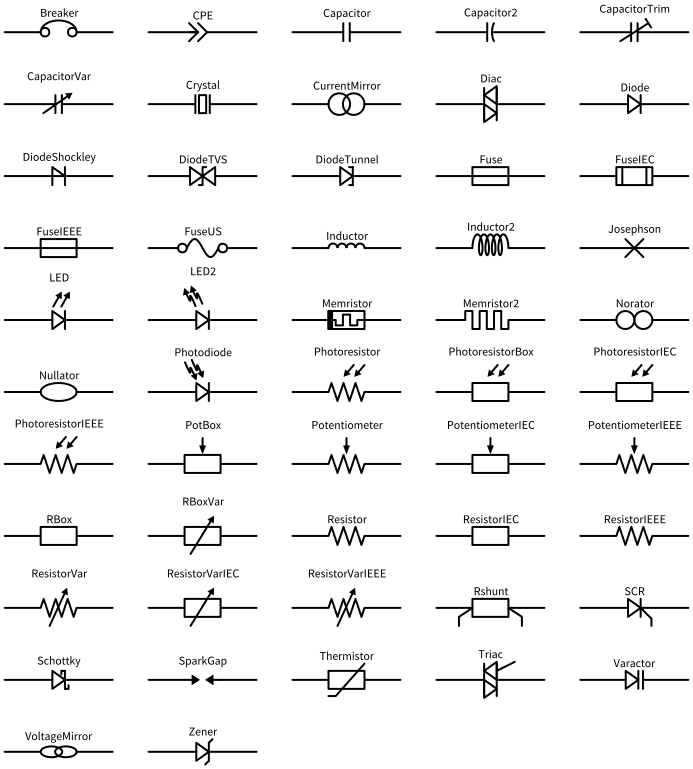

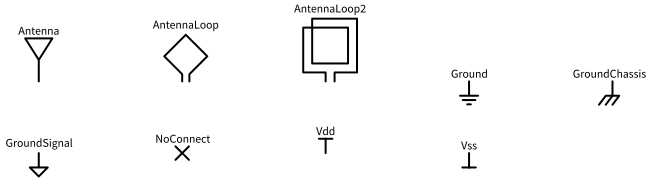

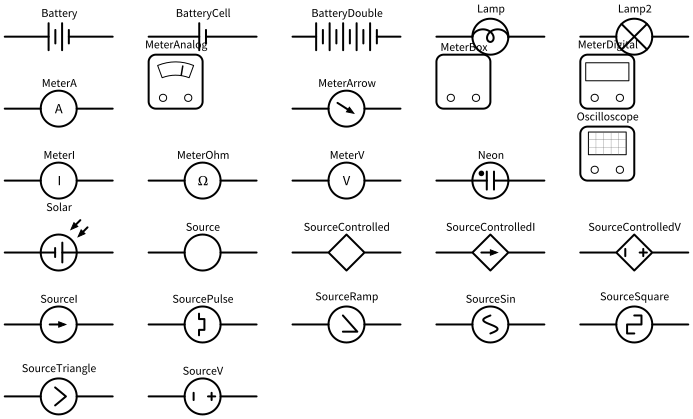

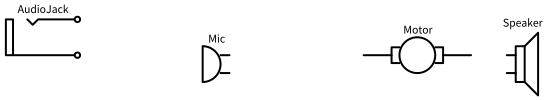

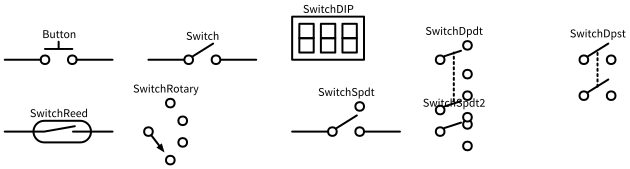

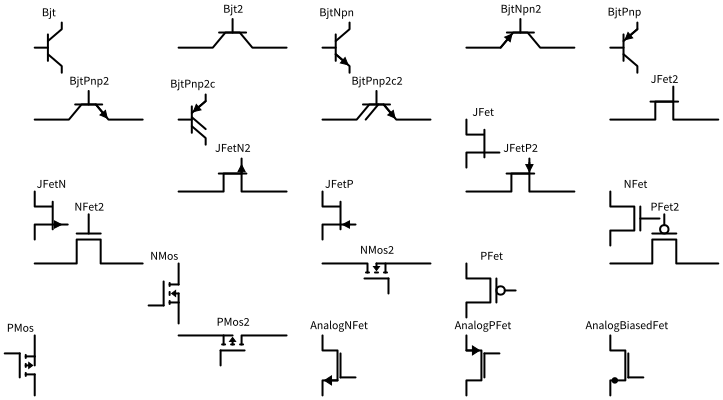

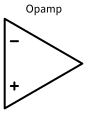

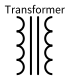

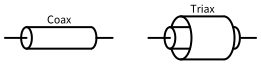

In [6]:
for mod in ['twoterm', 'oneterm', 'sources', 'misc', 'switches',
            'transistors', 'opamp', 'xform', 'cables']:
    display(drawElements(listmod(mod), d='right', color='blue'))

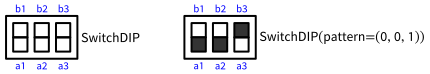

In [7]:
d = schemdraw.Drawing()
d += (elm.SwitchDIP().label('SwitchDIP', 'right')
     .label('a1', color='blue', loc='a1', valign='top', fontsize=11)
     .label('a2', color='blue', loc='a2', valign='top', fontsize=11)
     .label('a3', color='blue', loc='a3', valign='top', fontsize=11)
     .label('b1', color='blue', loc='b1', valign='bottom', fontsize=11)
     .label('b2', color='blue', loc='b2', valign='bottom', fontsize=11)
     .label('b3', color='blue', loc='b3', valign='bottom', fontsize=11))
d += (elm.SwitchDIP(pattern=(0, 0, 1)).label('SwitchDIP(pattern=(0, 0, 1))', 'right')
     .label('a1', color='blue', loc='a1', valign='top', fontsize=11)
     .label('a2', color='blue', loc='a2', valign='top', fontsize=11)
     .label('a3', color='blue', loc='a3', valign='top', fontsize=11)
     .label('b1', color='blue', loc='b1', valign='bottom', fontsize=11)
     .label('b2', color='blue', loc='b2', valign='bottom', fontsize=11)
     .label('b3', color='blue', loc='b3', valign='bottom', fontsize=11).at((5, 0)))
d.draw()

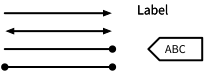

In [8]:
d = schemdraw.Drawing()
d += elm.Arrow()
d += elm.Arrow(double=True).at((0, -.5))
d += elm.Line(arrow='-o').at((0, -1))
d += elm.Line(arrow='o-o').at((0, -1.5))
d += elm.Label(label='Label').at((4, 0))
d += elm.Tag().at((4, -1)).label('ABC')
d.draw()

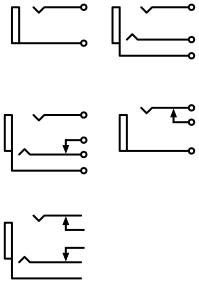

In [9]:
d = schemdraw.Drawing()
d += elm.AudioJack()
d += elm.AudioJack(ring=True).at((3, 0))
d += elm.AudioJack(ringswitch=True, ring=True).at((0, -3))
d += elm.AudioJack(switch=True).at((3, -3))
d += elm.AudioJack(ring=True, switch=True, ringswitch=True, dots=False).at((0, -6))
d.draw()

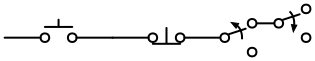

In [10]:
d = schemdraw.Drawing()
d += elm.Button()
d += elm.Button(nc=True)
d += elm.SwitchSpdt2(action='open')
d += elm.Line().length(.5)
d += elm.SwitchSpdt2(action='close')
d.draw()

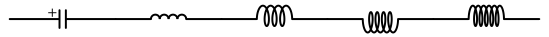

In [11]:
d = schemdraw.Drawing()
d += elm.Capacitor(polar=True).at((0, -1))
d += elm.Inductor()
d += elm.Inductor2(loops=3)
d += elm.Inductor2(loops=4).flip()
d += elm.Inductor2(loops=5).reverse()
d.draw()

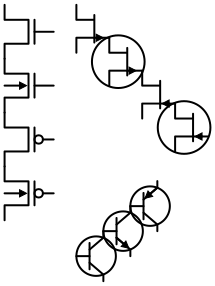

In [12]:
d = schemdraw.Drawing()
d += elm.NFet()
d += elm.NFet(bulk=True)
d += elm.PFet()
d += elm.PFet(bulk=True)
d.here = (2, 0)
d += elm.JFetN()
d += elm.JFetN(circle=True)
d += elm.JFetP()
d += elm.JFetP(circle=True)
d.here = (2, -7)
d += elm.Bjt(circle=True)
d += elm.BjtNpn(circle=True)
d += elm.BjtPnp(circle=True)
d.draw()

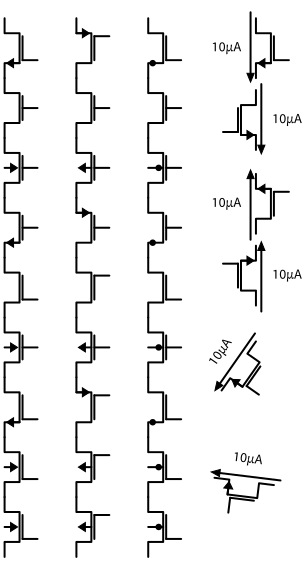

In [13]:
d = schemdraw.Drawing()
# check defaults and exhaustively test all analogFET options
d += elm.AnalogNFet()
d += elm.AnalogNFet(bulk=False, arrow=False, offset_gate=False)
d += elm.AnalogNFet(bulk=True,  arrow=False, offset_gate=False)
d += elm.AnalogNFet(bulk=False, arrow=True,  offset_gate=False)
d += elm.AnalogNFet(bulk=False, arrow=False, offset_gate=True )
d += elm.AnalogNFet(bulk=True,  arrow=True,  offset_gate=False)
d += elm.AnalogNFet(bulk=False, arrow=True,  offset_gate=True)
d += elm.AnalogNFet(bulk=True,  arrow=False, offset_gate=True )
d += elm.AnalogNFet(bulk=True,  arrow=True,  offset_gate=True )

d.here = (2,0)

d += elm.AnalogPFet()
d += elm.AnalogPFet(bulk=False, arrow=False, offset_gate=False)
d += elm.AnalogPFet(bulk=True,  arrow=False, offset_gate=False)
d += elm.AnalogPFet(bulk=False, arrow=True,  offset_gate=False)
d += elm.AnalogPFet(bulk=False, arrow=False, offset_gate=True )
d += elm.AnalogPFet(bulk=True,  arrow=True,  offset_gate=False)
d += elm.AnalogPFet(bulk=False, arrow=True,  offset_gate=True)
d += elm.AnalogPFet(bulk=True,  arrow=False, offset_gate=True )
d += elm.AnalogPFet(bulk=True,  arrow=True,  offset_gate=True )

d.here = (4,0)

d += elm.AnalogBiasedFet()
d += elm.AnalogBiasedFet(bulk=False, arrow=False, offset_gate=False)
d += elm.AnalogBiasedFet(bulk=True,  arrow=False, offset_gate=False)
d += elm.AnalogBiasedFet(bulk=False, arrow=True,  offset_gate=False)
d += elm.AnalogBiasedFet(bulk=False, arrow=False, offset_gate=True )
d += elm.AnalogBiasedFet(bulk=True,  arrow=True,  offset_gate=False)
d += elm.AnalogBiasedFet(bulk=False, arrow=True,  offset_gate=True)
d += elm.AnalogBiasedFet(bulk=True,  arrow=False, offset_gate=True )
d += elm.AnalogBiasedFet(bulk=True,  arrow=True,  offset_gate=True )

nmos = elm.AnalogNFet()
d += nmos.at((7,0))
d += elm.CurrentLabel().at(nmos).label('10µA')

nmos = elm.AnalogNFet()
d += nmos.reverse().at((7,-2))
d += elm.CurrentLabel().at(nmos).label('10µA')

nmos = elm.AnalogNFet()
d += nmos.flip().at((7,-6))
d += elm.CurrentLabel().at(nmos).label('10µA')

nmos = elm.AnalogNFet()
d += nmos.flip().reverse().at((7,-8))
d += elm.CurrentLabel().at(nmos).label('10µA')

nmos = elm.AnalogNFet()
d += nmos.at((7,-9)).theta(-35)
d += elm.CurrentLabel().at(nmos).label('10µA', rotate=True)

nmos = elm.AnalogNFet()
d += nmos.at((7.5,-13)).theta(263)
d += elm.CurrentLabel().at(nmos).label('10µA', rotate=True)
d.draw()

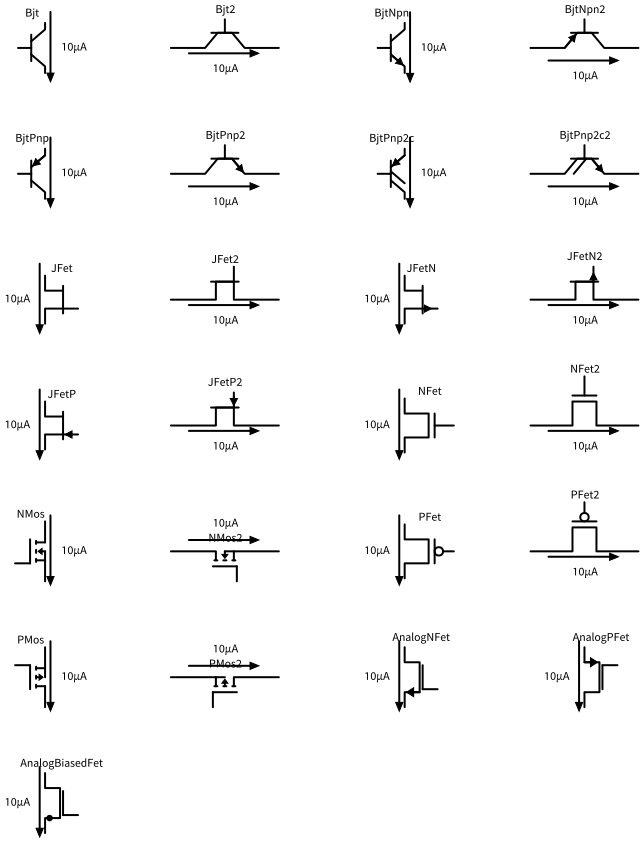

In [14]:
n=5
dx=1.25
dy=3.5
ofst=.8
x, y = 0, 0
d = schemdraw.Drawing(fontsize=12)
for e in listmod('transistors'):
    element = getattr(elm, e)
    el = element(toplabel=e, d='right')
    d += el.anchor('center').at([(d.unit+1)*x+1,y])
    d += elm.CurrentLabel().at(el).label("10µA")
    x = x + dx
    if x >= n:
        x=0
        y=y-dy
d.draw()

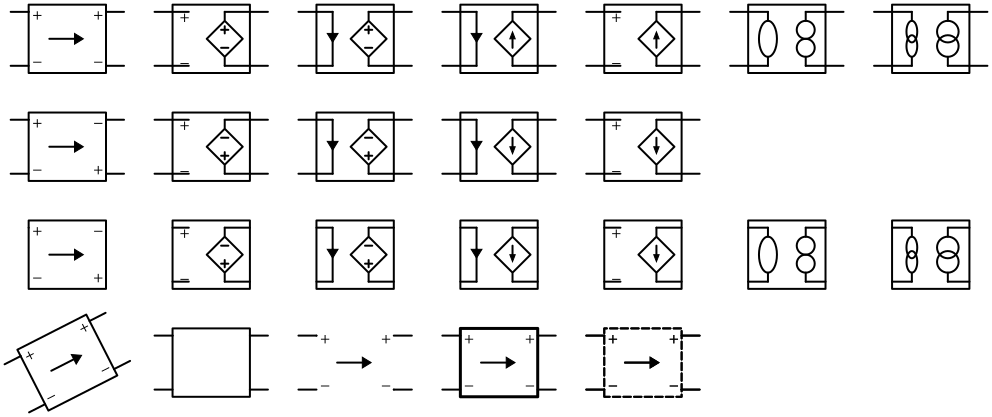

In [15]:
d  = schemdraw.Drawing()
d += elm.TwoPort().anchor('center').at([0,0])
d += elm.VoltageTransactor(terminals=True).anchor('center').at([4,0])
d += elm.TransimpedanceTransactor().anchor('center').at([8,0])
d += elm.CurrentTransactor().anchor('center').at([12,0])
d += elm.TransadmittanceTransactor().anchor('center').at([16,0])
d += elm.Nullor().anchor('center').at([20,0])
d += elm.VMCMPair().anchor('center').at([24,0])

d += elm.TwoPort(reverse_output=True).anchor('center').at([0,-3])
d += elm.VoltageTransactor(terminals=True, reverse_output=True).anchor('center').at([4,-3])
d += elm.TransimpedanceTransactor(terminals=True, reverse_output=True).anchor('center').at([8,-3])
d += elm.CurrentTransactor(terminals=True, reverse_output=True).anchor('center').at([12,-3])
d += elm.TransadmittanceTransactor(terminals=True, reverse_output=True).anchor('center').at([16,-3])

d += elm.TwoPort(reverse_output=True, terminals=False).anchor('center').at([0,-6])
d += elm.VoltageTransactor(terminals=False, reverse_output=True).anchor('center').at([4,-6])
d += elm.TransimpedanceTransactor(terminals=False, reverse_output=True).anchor('center').at([8,-6])
d += elm.CurrentTransactor(terminals=False, reverse_output=True).anchor('center').at([12,-6])
d += elm.TransadmittanceTransactor(terminals=False, reverse_output=True).anchor('center').at([16,-6])
d += elm.Nullor(terminals=False).anchor('center').at([20,-6])
d += elm.VMCMPair(terminals=False).anchor('center').at([24,-6])

d += elm.TwoPort().anchor('center').at([0,-9]).theta(27)
d += elm.TwoPort(sign=False, arrow=False).anchor('center').at([4,-9])
d += elm.TwoPort(box=False).anchor('center').at([8,-9])
d += elm.TwoPort(boxlw=3).anchor('center').at([12,-9])
d += elm.TwoPort(boxls='--').anchor('center').at([16,-9])
d += elm.TwoPort(boxls='--').anchor('center').at([16,-9])

d.draw()

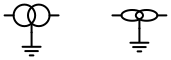

In [16]:
d  = schemdraw.Drawing(unit=1.5)
cm = elm.CurrentMirror()
vm = elm.VoltageMirror()
d += cm.at([0,0]).right().flip()
d += vm.at([3,0]).right().flip()

d += elm.Line().down().at(cm.common).length(0.25)
d += elm.Ground()
d += elm.Line().down().at(vm.common).length(0.25)
d += elm.Ground()

d.draw()

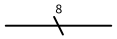

In [17]:
d  = schemdraw.Drawing()
d += elm.DataBusLine().at([0,-2]).label('8')
d.draw()

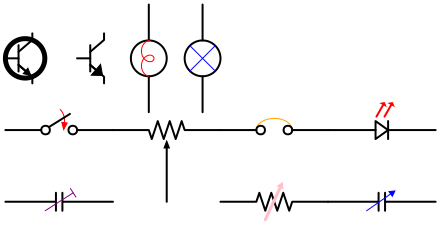

In [18]:
with schemdraw.Drawing():
    elm.BjtNpn(circle=True, circle_lw=5)
    elm.BjtNpn(arrowwidth=.4, arrowlength=.3).at((2, 0))
    elm.Lamp(filament_lw=1, filament_color='red').at((4, -1.5))
    elm.Lamp2(filament_lw=1, filament_color='blue').at((5.5, -1.5))
    elm.Switch(action='close', arrow_color='red', arrow_lw=1).at((0, -2)).right()
    elm.Potentiometer(tap_length=2).flip()
    elm.Breaker(arc_lw=1, arc_color='orange')
    elm.LED(arrow_color='red', arrowlength=.12)
    elm.CapacitorTrim(trim_lw=1, trim_color='purple').at((0, -4))
    elm.ResistorVar(arrow_lw=3, arrow_color='pink').at((6, -4))
    elm.CapacitorVar(arrow_lw=1, arrow_color='blue')

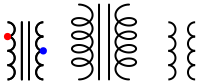

In [19]:
d = schemdraw.Drawing()
d += elm.Transformer()
d += elm.Transformer(loop=True).at((2, 0))
d += elm.Transformer(core=False).at((4.5, 0))
d += (X:=elm.Transformer())
d += elm.Dot().color('red').at(X.tapP3)
d += elm.Dot().color('blue').at(X.tapS2)
d 

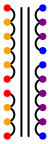

In [20]:
with schemdraw.Drawing():
    x = elm.Transformer(t1=(3,5), t2=(5, 3))
    elm.Dot().at(x.p1).color('red')
    elm.Dot().at(x.p2).color('red')
    elm.Dot().at(x.p3).color('red')
    elm.Dot().at(x.p4).color('red')
    elm.Dot().at(x.s1).color('blue')
    elm.Dot().at(x.s2).color('blue')
    elm.Dot().at(x.s3).color('blue')
    elm.Dot().at(x.s4).color('blue')
    elm.Dot().at(x.tapP1).color('orange')
    elm.Dot().at(x.tapP2).color('orange')
    elm.Dot().at(x.tapP3).color('orange')
    elm.Dot().at(x.tapP4).color('orange')
    elm.Dot().at(x.tapP5).color('orange')
    elm.Dot().at(x.tapP6).color('orange')
    elm.Dot().at(x.tapS1).color('purple')
    elm.Dot().at(x.tapS2).color('purple')
    elm.Dot().at(x.tapS3).color('purple')
    elm.Dot().at(x.tapS4).color('purple')
    elm.Dot().at(x.tapS5).color('purple')
    elm.Dot().at(x.tapS6).color('purple')


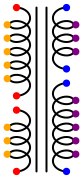

In [21]:
with schemdraw.Drawing():
    x = elm.Transformer(t1=(3,5), t2=(5, 3), loop=True)
    elm.Dot().at(x.p1).color('red')
    elm.Dot().at(x.p2).color('red')
    elm.Dot().at(x.p3).color('red')
    elm.Dot().at(x.p4).color('red')
    elm.Dot().at(x.s1).color('blue')
    elm.Dot().at(x.s2).color('blue')
    elm.Dot().at(x.s3).color('blue')
    elm.Dot().at(x.s4).color('blue')
    elm.Dot().at(x.tapP1).color('orange')
    elm.Dot().at(x.tapP2).color('orange')
    elm.Dot().at(x.tapP3).color('orange')
    elm.Dot().at(x.tapP4).color('orange')
    elm.Dot().at(x.tapP5).color('orange')
    elm.Dot().at(x.tapP6).color('orange')
    elm.Dot().at(x.tapP7).color('orange')
    elm.Dot().at(x.tapP8).color('orange')
    elm.Dot().at(x.tapS1).color('purple')
    elm.Dot().at(x.tapS2).color('purple')
    elm.Dot().at(x.tapS3).color('purple')
    elm.Dot().at(x.tapS4).color('purple')
    elm.Dot().at(x.tapS5).color('purple')
    elm.Dot().at(x.tapS6).color('purple')
    elm.Dot().at(x.tapS7).color('purple')
    elm.Dot().at(x.tapS8).color('purple')

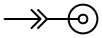

In [22]:
d = schemdraw.Drawing()
d += elm.Plug()
d += elm.Jack()
d += elm.CoaxConnect()
d.draw()

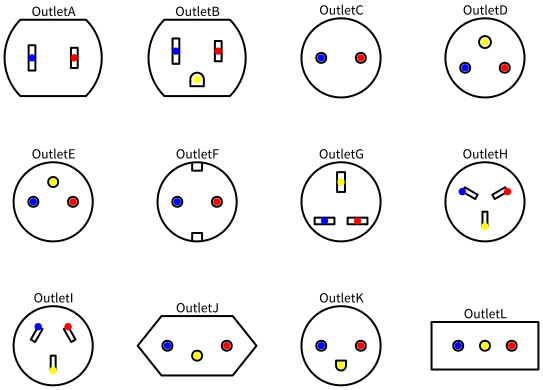

In [23]:
outlets = [elm.OutletA, elm.OutletB, elm.OutletC, elm.OutletD, elm.OutletE, elm.OutletF,
           elm.OutletG, elm.OutletH, elm.OutletI, elm.OutletJ, elm.OutletK, elm.OutletL]
d = schemdraw.Drawing()
for i, outlet in enumerate(outlets):
    K = outlet().label(outlet.__name__, loc='top')
    d.here = (i % 4) * 4, (i//4) * -4
    d += K

    d += elm.Dot().at(K.hot).color('red')
    d += elm.Dot().at(K.neutral).color('blue')
    if 'ground' in K.anchors:
        d += elm.Dot().at(K.ground).color('yellow')
d.draw()

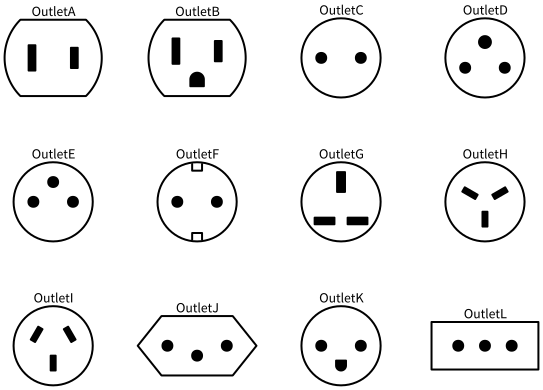

In [24]:
# Plug=True should fill
d = schemdraw.Drawing()
for i, outlet in enumerate(outlets):
    K = outlet(plug=True).label(outlet.__name__, loc='top')
    d.here = (i % 4) * 4, (i//4) * -4
    d += K
d.draw()

In [25]:
class ArduinoBoard(elm.ElementImage):
    def __init__(self):
        width = 8
        height = width/1.397  # Based on image dimensions
        # use xy to shift so (0, 0) is lower left corner of the board
        super().__init__('ArduinoUNO.png', width=width, height=height, xy=(-.75, 0))
    
        top = height * .956
        arefx = 2.5
        pinspace = 0.273
        for i, pinname in enumerate(['aref', 'gnd', 'pin13', 'pin12', 'pin11',
                                     'pin10', 'pin9', 'pin8']):
            self.anchors[pinname] = (arefx + i*pinspace, top)

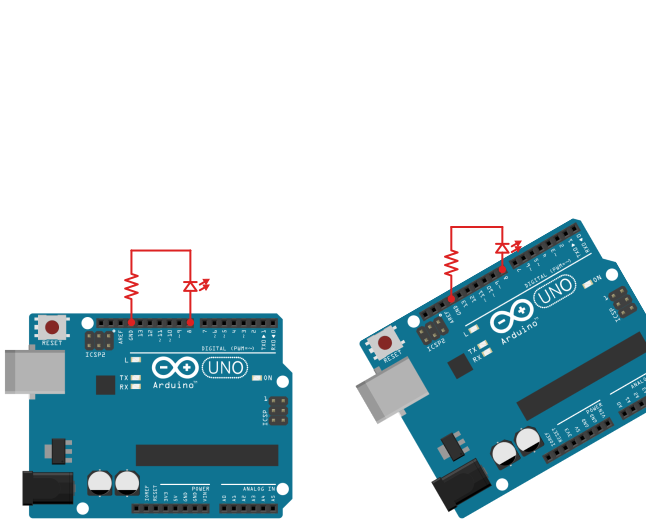

In [26]:
# Arduino Image from https://commons.wikimedia.org/wiki/File:ArduinoUNO.png, CC-BY-SA-3.0
schemdraw.use('svg')
with schemdraw.Drawing() as d:
    d.config(color='#dd2222', unit=2)
    arduino = ArduinoBoard()
    elm.Dot().at(arduino.gnd)
    elm.Resistor().up().scale(.7)
    elm.Line().right().tox(arduino.pin8)
    elm.LED().down().reverse().toy(arduino.pin8).scale(.7)
    elm.Dot().at(arduino.pin8)

    arduino = ArduinoBoard().at((12, 0)).theta(30)
    elm.Dot().at(arduino.gnd)
    elm.Resistor().up().scale(.7)
    elm.Line().right().tox(arduino.pin8)
    elm.LED().down().reverse().toy(arduino.pin8).scale(.7)
    elm.Dot().at(arduino.pin8)

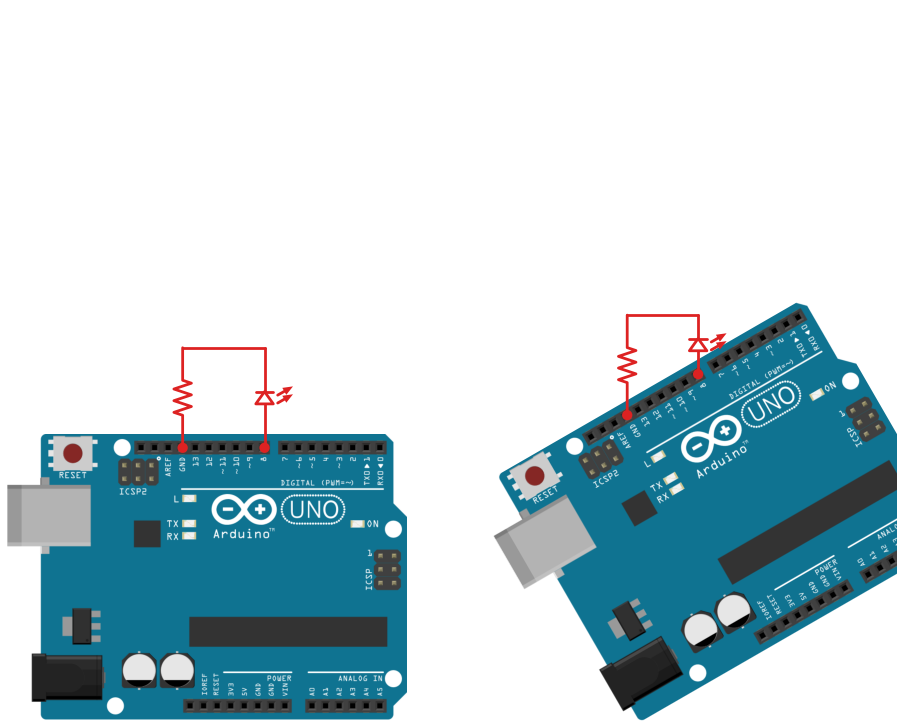

In [27]:
schemdraw.use('matplotlib')
with schemdraw.Drawing() as d:
    d.config(color='#dd2222', unit=2)
    arduino = ArduinoBoard()
    elm.Dot().at(arduino.gnd)
    elm.Resistor().up().scale(.7)
    elm.Line().right().tox(arduino.pin8)
    elm.LED().down().reverse().toy(arduino.pin8).scale(.7)
    elm.Dot().at(arduino.pin8)

    arduino = ArduinoBoard().at((12, 0)).theta(30)
    elm.Dot().at(arduino.gnd)
    elm.Resistor().up().scale(.7)
    elm.Line().right().tox(arduino.pin8)
    elm.LED().down().reverse().toy(arduino.pin8).scale(.7)
    elm.Dot().at(arduino.pin8)